# Welcome  
This project aims to build a **machine learning model** to analyze and predict outcomes based on the given dataset. Various algorithms, including **Decision Trees**, are implemented to evaluate performance and accuracy.

## Introduction  
- The dataset is **loaded and preprocessed** to handle missing values and ensure data quality.  
- **Exploratory Data Analysis (EDA)** is performed to understand patterns and relationships within the data.  
- Different **machine learning models** are trained and tested, including:  
  - Decision Tree  
  - Linear Regression  
  - Random Forest (if applicable)  
- Model **performance is evaluated** using appropriate metrics such as RMSE, MAE, and R².  
- **Visualizations** are generated to better understand feature importance and model predictions.  

## Loading Libraries  
In this section, we import the necessary libraries for data processing, visualization, and model building.


In [ ]:

import numpy as np                 
import pandas as pd                
import matplotlib.pyplot as plt     
import seaborn as sns               

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict
from sklearn import tree


plt.style.use('seaborn-darkgrid')


## Loading Data

In [9]:
data=pd.read_csv("supermarket_sales - Sheet1.csv")
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


## Understanding data structure

# All columes

In [11]:
data.columns


Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

## structure of dataset

In [13]:
data.shape

(1000, 17)

In [15]:
data.size

17000

In [17]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

## Summary of datase

In [19]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,26.494628,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,245.885335,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,234.176510,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,0.000000,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580,4.000000,5.500000,7.000000,8.500000,10.000000


In [21]:
data.describe(include = 'object').T


,count,unique,top,freq
Invoice ID,1000,1000,849-09-3807,1
Branch,1000,3,A,340
City,1000,3,Yangon,340
Customer type,1000,2,Member,501
Gender,1000,2,Female,501
Product line,1000,6,Fashion accessories,178
Date,1000,89,2/7/2019,20
Time,1000,506,19:48,7
Payment,1000,3,Ewallet,345


## Count of each label in categorical column

In [29]:
data['Product line'].value_counts()


Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64

In [31]:
data['Branch'].value_counts()



Branch
A    340
B    332
C    328
Name: count, dtype: int64

In [33]:
data['City'].value_counts()


City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64

## Missing Value Treatmen

In [35]:
data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

## Handling Missing Values  

In our dataset, there are missing values in the target variable, which we will use for predicting the [Your Target Variable]. It is essential to handle these missing values appropriately to improve the accuracy of our model.


In [37]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from tabulate import tabulate

In [41]:
def sep(df):
    categorical = []
    continuous = []
    
    for column in df.columns:
        if df[column].nunique() < 15: 
            categorical.append(column)
        else:
            continuous.append(column)  
                
    return categorical, continuous


categorical, continuous = sep(data)

table = {"Categorical": categorical, "Continuous": continuous}
print(tabulate(table, headers=["Categorical", "Continuous"]))

Categorical              Continuous
-----------------------  ------------
Branch                   Invoice ID
City                     Unit price
Customer type            Tax 5%
Gender                   Total
Product line             Date
Quantity                 Time
Payment                  cogs
gross margin percentage  gross income
                         Rating


## Performing EDA(Univariate)

In [ ]:
def info_of_cat(col, data): 
    print(f"Unique values in '{col}' are: {data[col].unique()}")  
    print(f"Mode of '{col}' is: {data[col].mode()[0]}")  
    print(f"Number of missing values in '{col}' is: {data[col].isnull().sum()}")  
    
    if data[col].isnull().sum() > 0:  
        print(f"\nThere are null values in the '{col}' column.")
        



In [47]:
info_of_cat("Payment",data)

Unique values in 'Payment' are: ['Ewallet' 'Cash' 'Credit card']
Mode of 'Payment' is: Ewallet
Number of missing values in 'Payment' is: 0


In [49]:
info_of_cat("Customer type",data)

Unique values in 'Customer type' are: ['Member' 'Normal']
Mode of 'Customer type' is: Member
Number of missing values in 'Customer type' is: 0


## EDA(continuous columns

In [51]:
def info_of_numerical(col):
    print(f"The mean of the {col} is {data[col].mean()}")
    print(f"The median of the {col} is {data[col].median()}")
    print(f"The mode of the {col} is {data[col].mode()[0]}")
    print(f"The standard deviation of the {col} is {data[col].std()}")
    print(f"Number of missing values in the {col} is {data[col].isnull().sum()}")
    

In [55]:
info_of_numerical('Unit price')  


The mean of the Unit price is 55.67213
The median of the Unit price is 55.230000000000004
The mode of the Unit price is 83.77
The standard deviation of the Unit price is 26.49462834791978
Number of missing values in the Unit price is 0


In [59]:
info_of_numerical('Quantity')  
info_of_numerical('gross income')


The mean of the Quantity is 5.51
The median of the Quantity is 5.0
The mode of the Quantity is 10
The standard deviation of the Quantity is 2.923430595455696
Number of missing values in the Quantity is 0
The mean of the gross income is 15.379368999999999
The median of the gross income is 12.088000000000001
The mode of the gross income is 4.154
The standard deviation of the gross income is 11.708825480998659
Number of missing values in the gross income is 0


## Feature Engineering

In [61]:
def sep(df):
    categorical = []
    continuous = []
    
    for column in df.columns:
        if df[column].nunique() < 15:
            categorical.append(column)
            
        else:
            continuous.append(column)
                
    return categorical, continuous

categorical, continuous = sep(data)

table ={"Categorical":categorical, "Continuous":continuous}
print(tabulate(table, headers=["Categorical","continuous"]))



Categorical              continuous
-----------------------  ------------
Branch                   Invoice ID
City                     Unit price
Customer type            Tax 5%
Gender                   Total
Product line             Date
Quantity                 Time
Payment                  cogs
gross margin percentage  gross income
                         Rating


###  Histogram of all numerical features

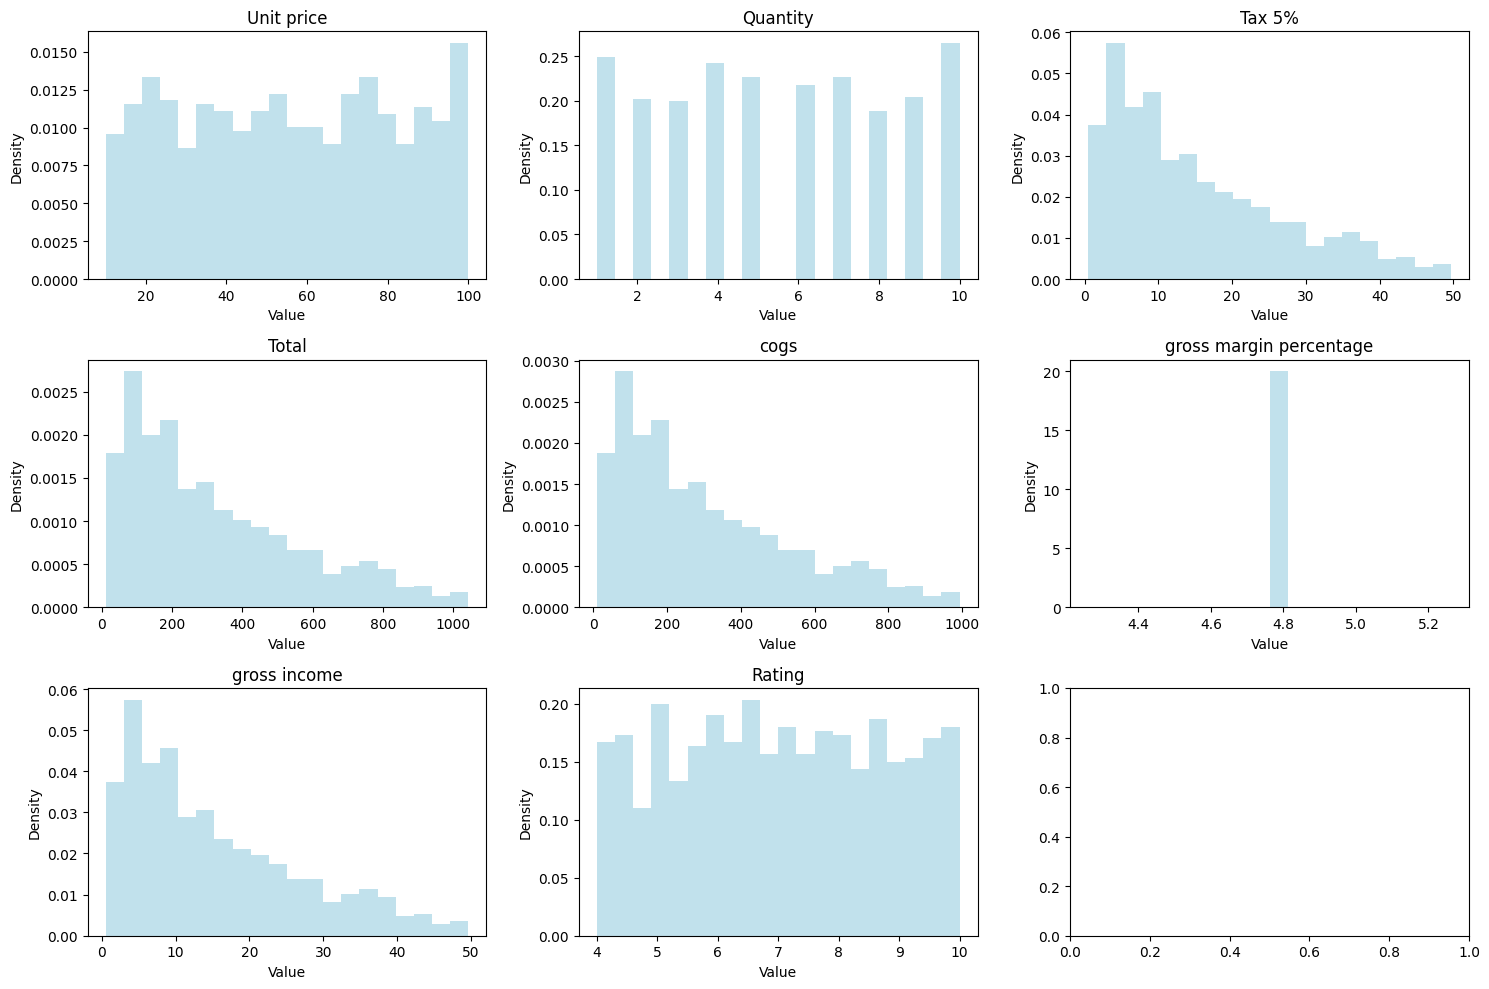

In [ ]:
import matplotlib.pyplot as plt


numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
new_df = data.select_dtypes(include=numerics)

numeric_cols = new_df.columns  
num_cols = 3 
n_bins = 20   


num_rows = (len(numeric_cols) + num_cols - 1) // num_cols


fig, axs = plt.subplots(num_rows, num_cols, tight_layout=True, figsize=(15, 10))


for col, ax in zip(numeric_cols, axs.flatten()):
    ax.hist(data[col], bins=n_bins, density=True, alpha=0.75, color='lightblue')
    ax.set_title(col)
    ax.set_xlabel("Value")
    ax.set_ylabel("Density")

plt.show()


## Using Label Encoder technique to convert categorical column into numerical type

In [67]:
label_encoder=preprocessing.LabelEncoder()

In [ ]:
from sklearn import preprocessing


label_encoder = preprocessing.LabelEncoder()


categorical_cols = ["Branch", "City", "Customer type", "Gender", "Product line", "Payment"]


for col in categorical_cols:
    data[f"{col}_encoded"] = label_encoder.fit_transform(data[col])
    
    
    print(f"Unique values in {col} (Encoded): {data[f'{col}_encoded'].unique()}")


Unique values in Branch (Encoded): [0 2 1]
Unique values in City (Encoded): [2 1 0]
Unique values in Customer type (Encoded): [0 1]
Unique values in Gender (Encoded): [0 1]
Unique values in Product line (Encoded): [3 0 4 5 2 1]
Unique values in Payment (Encoded): [2 0 1]


## Data Visualization

<Axes: xlabel='Total', ylabel='Count'>

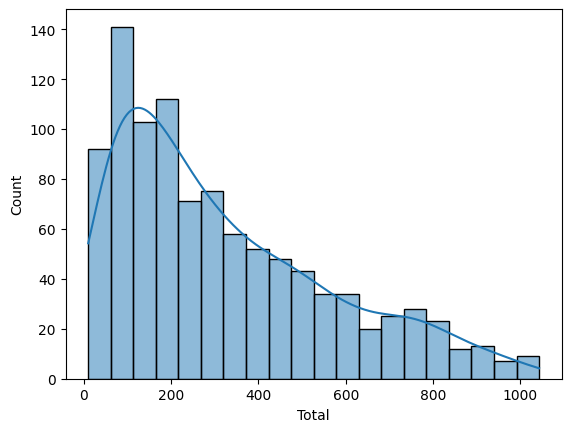

In [71]:
sns.histplot(x='Total', data=data, bins=20, kde=True)

<Axes: xlabel='Payment', ylabel='Count'>

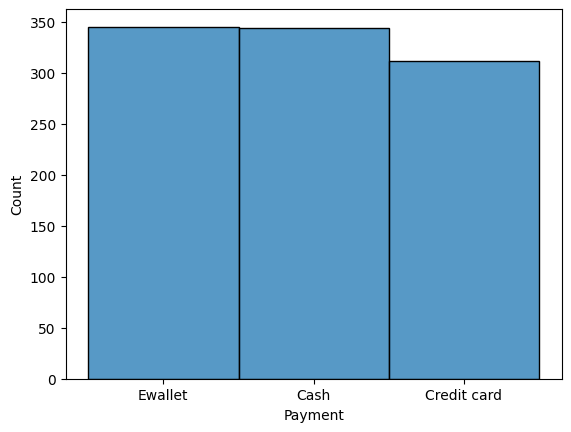

In [77]:

sns.histplot(x='Payment', data=data, bins=10)


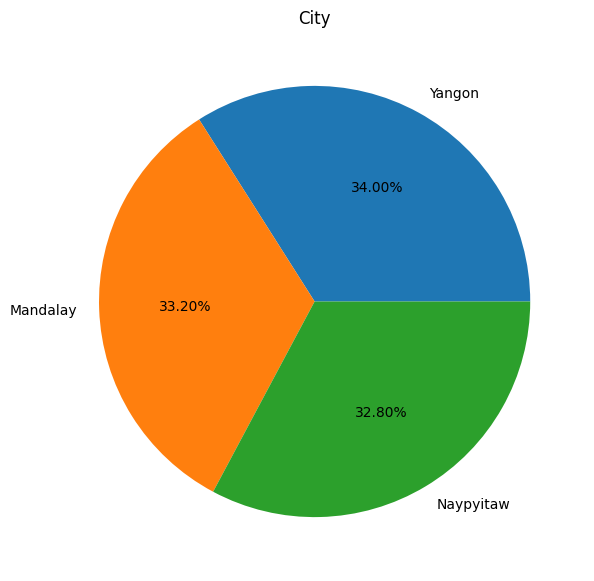

In [ ]:
encoded_column = "City"  
plt.figure(figsize=(15,7))
x = data[encoded_column].value_counts()
y = data[encoded_column].value_counts().index
plt.pie(x, labels=y, autopct="%.2f%%")
plt.title(encoded_column)  
plt.show()


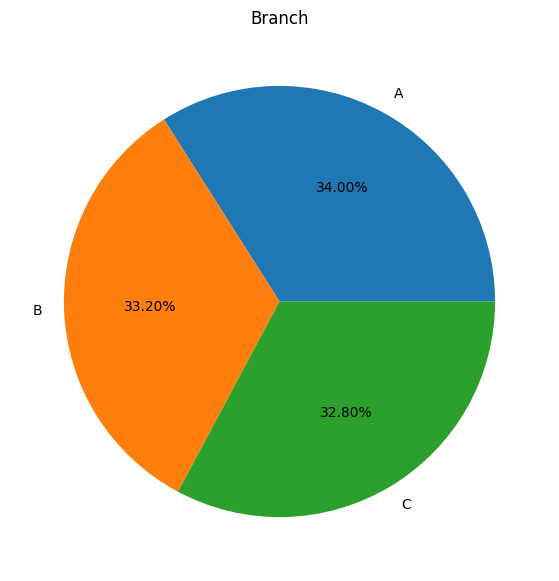

In [ ]:
encoded_column = "Branch"  
plt.figure(figsize=(15,7))
x = data[encoded_column].value_counts()
y = data[encoded_column].value_counts().index
plt.pie(x, labels=y, autopct="%.2f%%")
plt.title(encoded_column)  
plt.show()

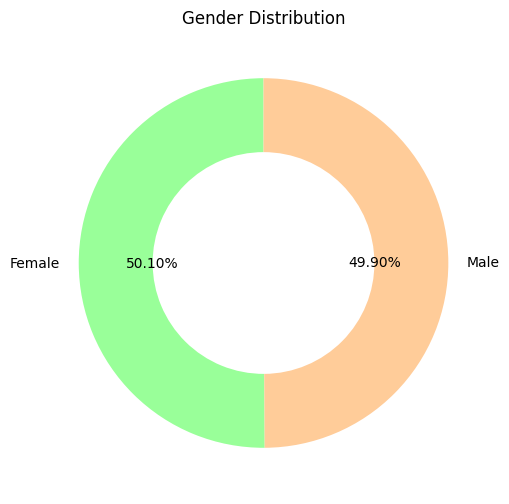

In [91]:
plt.figure(figsize=(8, 6))
gender_counts = data["Gender"].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct="%.2f%%", startangle=90, colors=['#99ff99','#ffcc99'], wedgeprops=dict(width=0.4))
plt.title("Gender Distribution")
plt.show()



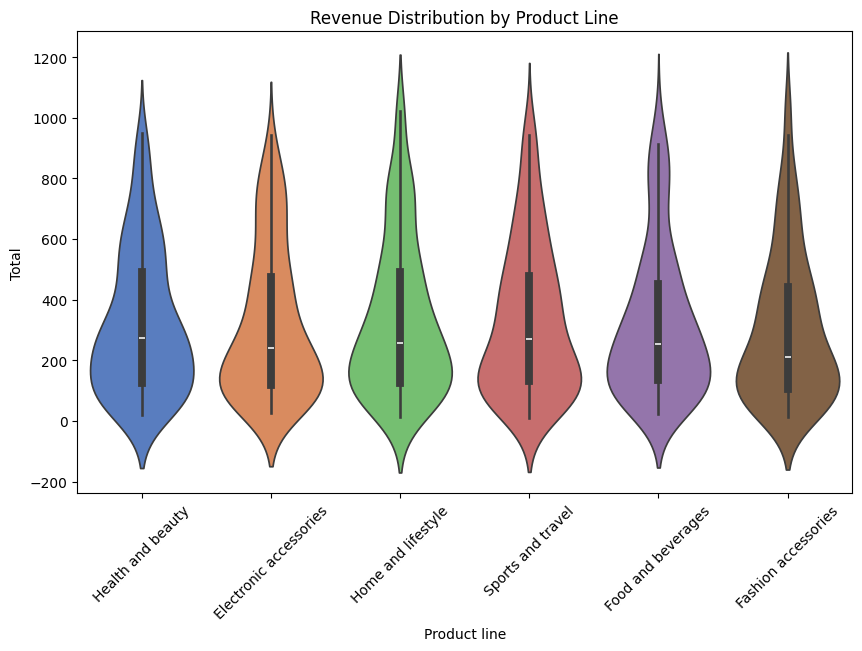

In [97]:
plt.figure(figsize=(10, 6))
sns.violinplot(x="Product line", y="Total", data=data, palette="muted")
plt.xticks(rotation=45)
plt.title("Revenue Distribution by Product Line")
plt.show()



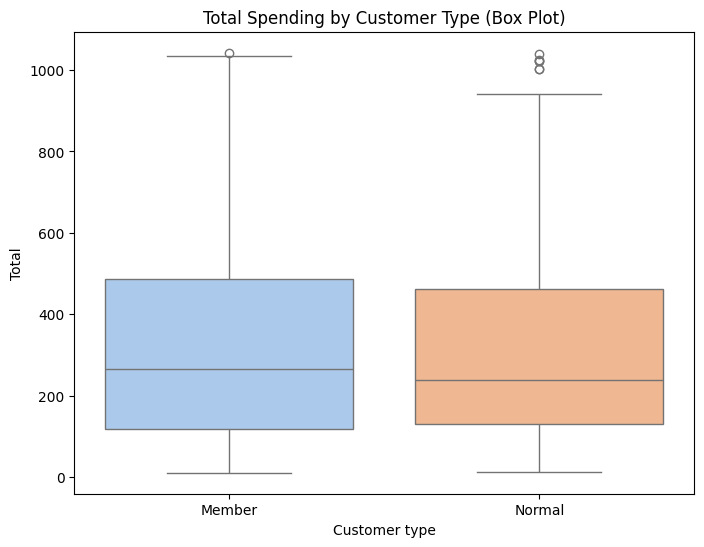

In [99]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="Customer type", y="Total", data=data, palette="pastel")
plt.title("Total Spending by Customer Type (Box Plot)")
plt.show()


### Feature Scaling

In [101]:
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'Branch_encoded', 'City_encoded', 'Customer type_encoded',
       'Gender_encoded', 'Product line_encoded', 'Payment_encoded'],
      dtype='object')

### Defining method to perform data scaling operation based on the type of scaling

In [260]:


def feature_scale(scale):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    new_data = data.select_dtypes(include=numerics)
    if scale == 'minmax':
        scaler = MinMaxScaler()
    else:
        scaler = StandardScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(new_data.to_numpy()),columns=new_data.columns)
    return df_scaled

### scaling the data using MinMax Scaling process

In [ ]:
scale = 'minmax' 
df_scaled=feature_scale(scale)
df_scaled


,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Branch_encoded,City_encoded,Customer type_encoded,Gender_encoded,Product line_encoded,Payment_encoded
0,0.72,0.67,0.52,0.52,0.52,0.00,0.52,0.85,0.00,1.00,0.00,0.00,0.60,1.00
1,0.06,0.44,0.07,0.07,0.07,0.00,0.07,0.93,1.00,0.50,1.00,0.00,0.00,0.00
2,0.40,0.67,0.32,0.32,0.32,0.00,0.32,0.57,0.00,1.00,1.00,1.00,0.80,0.50
3,0.54,0.78,0.46,0.46,0.46,0.00,0.46,0.73,0.00,1.00,0.00,1.00,0.60,1.00
4,0.85,0.67,0.60,0.60,0.60,0.00,0.60,0.22,0.00,1.00,1.00,1.00,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.34,0.00,0.03,0.03,0.03,0.00,0.03,0.37,1.00,0.50,1.00,1.00,0.60,1.00
996,0.97,1.00,0.98,0.98,0.98,0.00,0.98,0.07,0.50,0.00,1.00,0.00,0.80,1.00
997,0.24,0.00,0.02,0.02,0.02,0.00,0.02,0.62,0.00,1.00,0.00,1.00,0.40,0.00
998,0.62,0.00,0.06,0.06,0.06,0.00,0.06,0.02,0.00,1.00,1.00,1.00,0.80,0.00


## Feature Selection

In [ ]:

corr = scaled_data.corr()


corr.style.background_gradient(cmap='coolwarm')


,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Branch_encoded,City_encoded,Customer type_encoded,Gender_encoded,Product line_encoded,Payment_encoded
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,nan,0.633962,-0.008778,0.028202,-0.013763,-0.020238,0.015445,0.019321,-0.015941
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,nan,0.705510,-0.015815,0.015964,-0.002121,-0.016763,-0.074258,0.020256,-0.003921
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,nan,1.000000,-0.036442,0.041047,-0.012812,-0.019670,-0.049451,0.031621,-0.012434
Total,0.633962,0.705510,1.000000,1.000000,1.000000,nan,1.000000,-0.036442,0.041047,-0.012812,-0.019670,-0.049451,0.031621,-0.012434
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,nan,1.000000,-0.036442,0.041047,-0.012812,-0.019670,-0.049451,0.031621,-0.012434
gross margin percentage,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,nan,1.000000,-0.036442,0.041047,-0.012812,-0.019670,-0.049451,0.031621,-0.012434
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,nan,-0.036442,1.000000,0.010238,0.049585,0.018889,0.004800,-0.020529,-0.005381
Branch_encoded,0.028202,0.015964,0.041047,0.041047,0.041047,nan,0.041047,0.010238,1.000000,-0.507401,-0.019608,-0.056318,-0.053938,-0.050104
City_encoded,-0.013763,-0.002121,-0.012812,-0.012812,-0.012812,nan,-0.012812,0.049585,-0.507401,1.000000,0.004899,0.012219,0.008811,0.019094


### Correlation Heatmap

<Axes: >

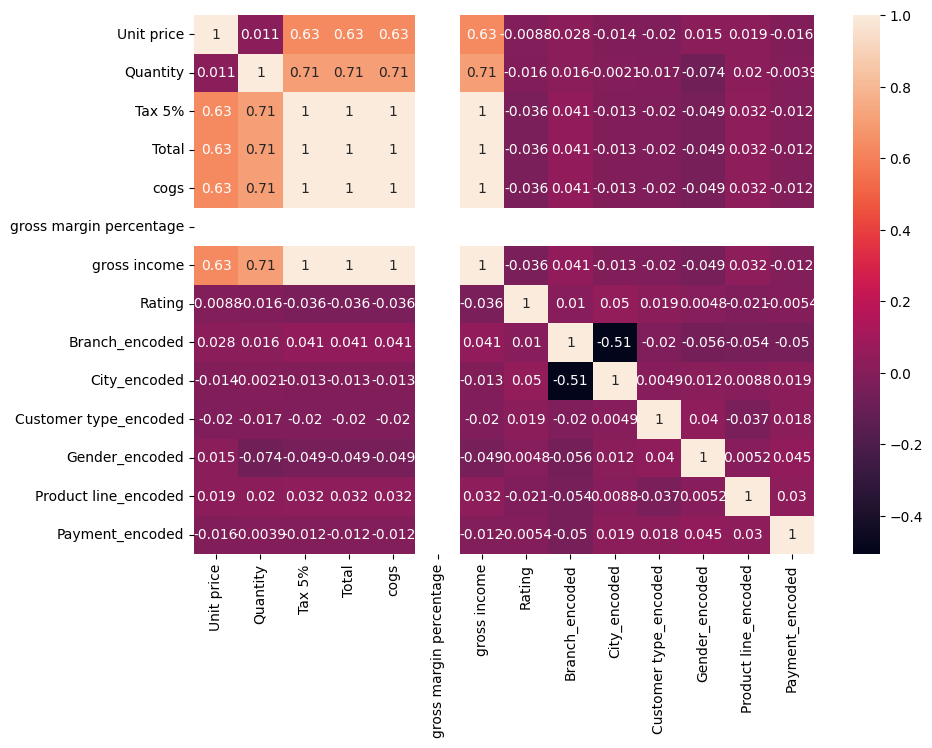

In [266]:
plt.figure(figsize=(10,7)) 
sns.heatmap(df_scaled.corr(),annot=True)

In [130]:
print(data["gross margin percentage"].unique())



[4.76190476]


## Spilting the dataset

In [ ]:

print(df_scaled.columns)


Index(['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross margin percentage', 'gross income', 'Rating', 'Branch_encoded', 'City_encoded', 'Customer type_encoded', 'Gender_encoded', 'Product line_encoded', 'Payment_encoded'], dtype='object')


In [140]:
train = df_scaled[~df_scaled['Total'].isnull()]

### Creating  the regression model

In [ ]:


X_train = train.loc[:, ('Unit price', 'Branch_encoded', 'City_encoded', 'Quantity')]
y_train = train['Total']  



In [ ]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
reg.fit(X_train, y_train)  
print("Intercept:", reg.intercept_)
print("Coefficients:", reg.coef_)
c_r_sq=reg.score(X_train, y_train)
print('coefficient of determination:', c_r_sq)


Intercept: -0.2164471179899326
Coefficients: [0.50606235 0.00852516 0.00273597 0.51239548]
coefficient of determination: 0.8902811202347087


### Testing the model

In [ ]:

test = df_scaled[df_scaled['Total'].isnull()]


required_columns = ['Unit price', 'Branch_encoded', 'City_encoded', 'Quantity', 'Total']
x_test = test.loc[:, ['Unit price', 'Branch_encoded', 'City_encoded', 'Quantity']]
y_test = test['Total']

In [170]:
y_hat_test = reg.predict(X_train)


In [172]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,1.64
1,1.05
2,1.39
3,1.58
4,1.75


In [174]:
y_train.shape

(1000,)

In [ ]:
rf_score=reg.score(X_train,y_train)
rf_rmse=np.sqrt(mean_squared_error(y_train,y_hat_test))
print(rf_score)
print(rf_rmse) 
    

0.8902811202347087
0.07888389578039702


## Build Random Forest Model

#### A Random Forest Algorithm is a supervised machine learning algorithm which is extremely popular and is used for Classification and Regression problems in Machine Learning. We know that a forest comprises numerous trees, and the more trees more it will be robust.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

In [ ]:
 


X = data[['Unit price', 'Branch_encoded', 'City_encoded', 'Quantity']]  
y = data['Total']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)



Train shape: (800, 4) (800,)
Test shape: (200, 4) (200,)


In [200]:
forest = RandomForestRegressor(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [278]:
y_pred_test = forest.predict(X_test)
print("Predicted values:", y_pred_test)


Predicted values: [526.70709  585.187995 410.59368  138.104925  47.59083  590.1357
 126.79611  715.918665 452.54937  130.70379  426.73239  473.980185
 212.4171   251.97858  293.034735 339.373335 582.912645 223.013805
 750.849225 185.00034  424.961565 179.13063  126.64113  124.68876
 237.50181  195.83823  748.512555  31.40634  144.52767   56.380695
  75.73314  609.164535  96.05106  429.912    192.83838  175.4907
 661.489185 207.29898  191.103045 206.12949  216.595575 907.34805
  68.274255 182.33481   92.60202  402.01224  229.63668   68.54253
 325.64343  287.12943  430.383975 102.04656   71.603595 269.56692
 181.125525 488.67735  460.223925  67.282635 452.72703  218.835855
 124.842165  34.710165  87.258885 938.723415 384.92496  494.657835
 378.64449  756.96684  932.56926  121.8147   410.65584  121.59882
 295.03467   89.87643   66.73065  693.09177  759.975195 250.64109
  73.335255 743.78367  312.39894   68.93229  356.39415  619.69131
 216.907005 269.163615  69.911835 827.62785  381.059175

In [ ]:
rf = RandomForestRegressor(random_state=42, n_jobs=-1) 

## Building Decision Tree Regressor

####  The Root Node is the initial node which represents the entire sample and may get split further into further nodes.

In [216]:
dtm = DecisionTreeRegressor(max_depth=4,
                           min_samples_split=5,
                           max_leaf_nodes=10)

dtm.fit(X_train,y_train)
print("R-Squared on train dataset={}".format(dtm.score(X_train,y_train)))

R-Squared on train dataset=0.9287378158136504


In [218]:
y_hat_test2 = dtm.predict(X_train)

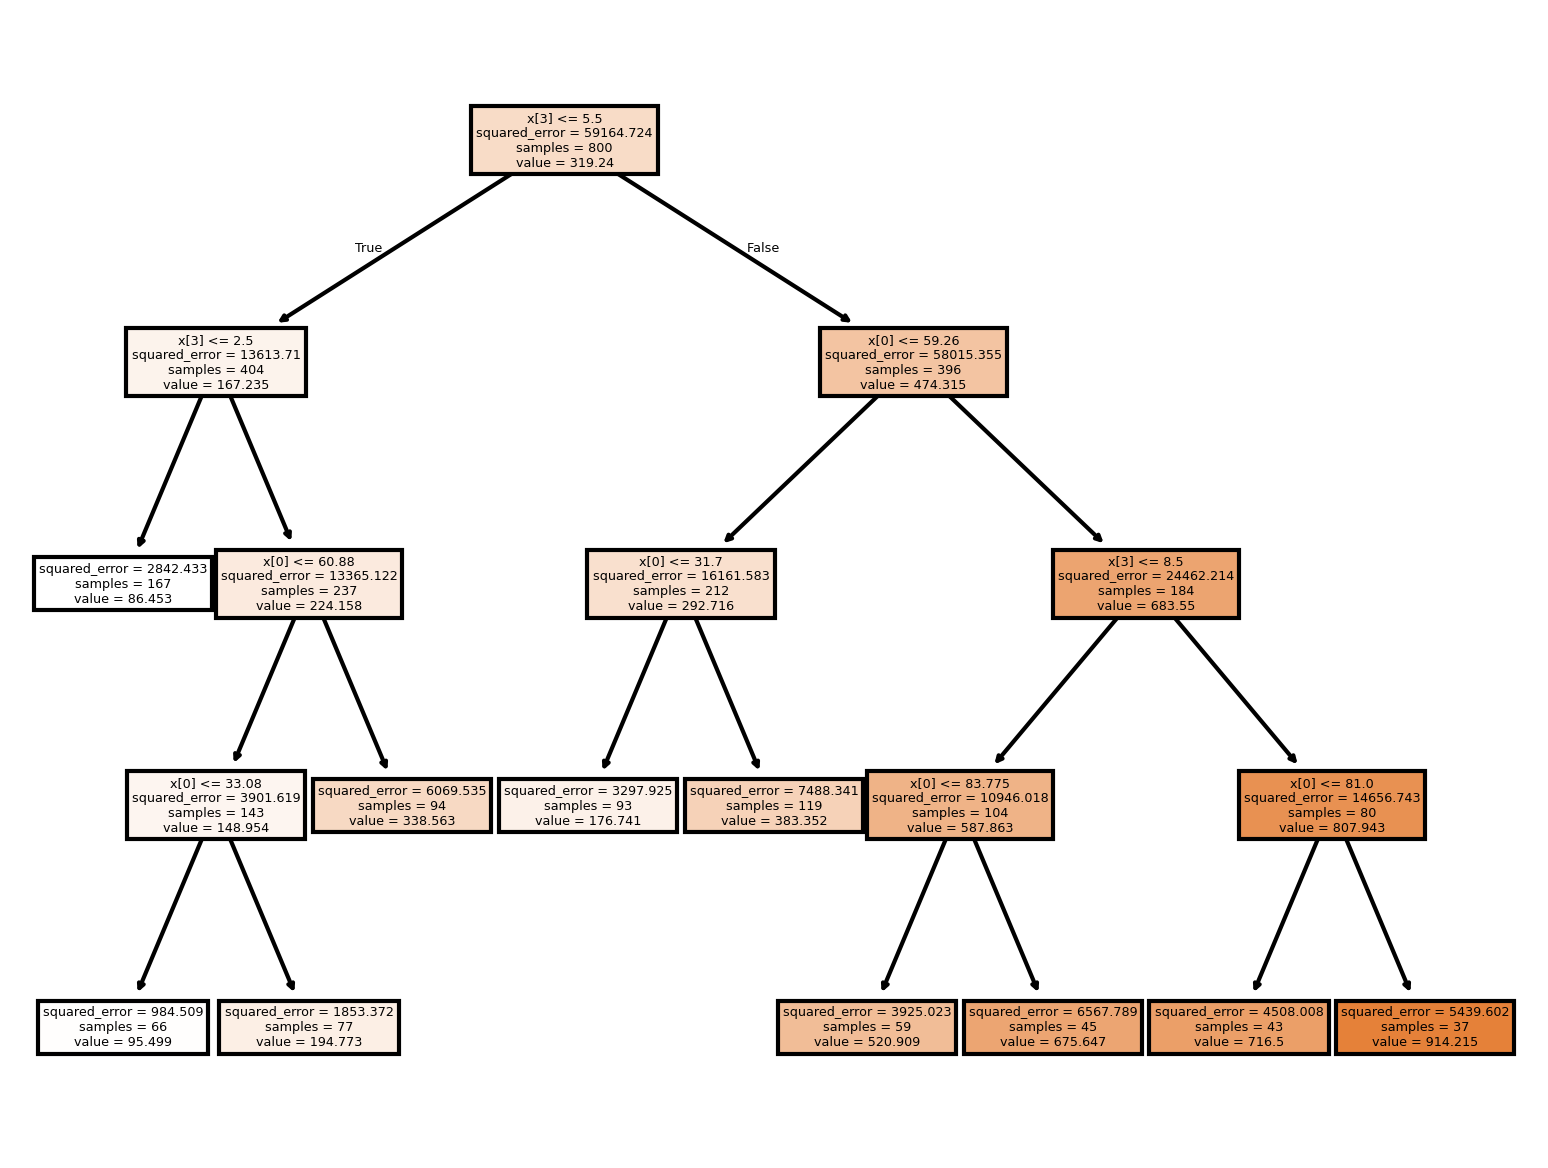

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig, axes = plt.subplots(dpi=300)


plot_tree(dtm, filled=True)


fig.savefig('MyDataset_decision_tree.png')


## Testing of decision tree

In [222]:
y_dec_test = dtm.predict(X_test)

In [224]:
X_test.size

800

In [226]:
df_pf = pd.DataFrame(np.exp(y_dec_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,16896244266420067598288371355679675940343527952...
1,30723212596230057424356604777281760005495013505...
2,30723212596230057424356604777281760005495013505...
3,38804188451540222697637558307253932449273691298...
4,35164549147556343199235355091566329856.00


In [228]:
rf_score=dtm.score(X_train,y_train)
rf_rmse2=np.sqrt(mean_squared_error(y_train,y_hat_test2))
print(rf_score)
print(rf_rmse2)

0.9287378158136504
64.932330076215


In [ ]:
import pandas as pd


data = pd.read_csv("supermarket_sales - Sheet1.csv")  


X = data[['Quantity', 'Unit price']]  
y = data['Total']  


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import joblib

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

joblib.dump(model, "sales_prediction_model.pkl")
print("✅ Model saved successfully as sales_prediction_model.pkl!")



✅ Model saved successfully as sales_prediction_model.pkl!


## Conclusion:

###  Root Mean Square Error (one of the most commonly used measures for evaluating the quality of predictions).
* RMSE for linear regression=0.9287378158136504

* RMSE for decision tree =0.9287378158136504

#### Model which is having lowest RMSE is considered as best model so for prediction we will use  Random Forest Model